In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

In [36]:
vol_path = '/Users/nickhattrup/Documents/research/projects/MDPilot/examples/ionic_liquid/1_3_dimethylimidazolium_BF4/moltemplate_files/volume_aftercooling_nvt.dat'
pressure_path = '/Users/nickhattrup/Documents/research/projects/MDPilot/examples/ionic_liquid/1_3_dimethylimidazolium_BF4/moltemplate_files/pressure_aftercooling_nvt.dat'
temperature_path = '/Users/nickhattrup/Documents/research/projects/MDPilot/examples/ionic_liquid/1_3_dimethylimidazolium_BF4/moltemplate_files/temperature_aftercooling_nvt.dat'

In [37]:
vol_data = pd.read_csv(vol_path, sep='\s+', skiprows=1)
pressure_data = pd.read_csv(pressure_path, sep='\s+', skiprows=1)
temperature_data = pd.read_csv(temperature_path, sep='\s+', skiprows=1)

In [38]:
vol_labels=vol_data.columns[1:]
vol_values=vol_data.values[:, :-1]
pressure_labels=pressure_data.columns[1:]
pressure_values=pressure_data.values[:, :-1]
temperature_labels=temperature_data.columns[1:]
temperature_values=temperature_data.values[:, :-1]

In [47]:
np.mean(pressure_values[:, 1])

101.67403709199999

In [39]:
timeStep = 0.5e-6 # ns
volumeScale = 1e-3
densityScale = 10**24 # A^3 -> cm^3
targetPressure = 1
molarMass = 197.97 # g/mol 
particleCount = 500 
# Total ion-pairs = 500 
totalMass = molarMass*particleCount/(6.022*10**23) # g 


# Literature denisty 
# 1.3-dimethylimidazolium tetrafluoroborate
refDensity = 1.294 # g/cm^3

In [40]:
den_vals = totalMass/vol_values[:, 1]

In [41]:
densityScale*totalMass/126332.204895233

1.30111163418114

In [42]:
# Get cumulative average of volume and pressure
vol_cumulative = np.cumsum(vol_values[:, 1], axis=0)
vol_cumulative /= np.arange(1, vol_cumulative.shape[0]+1)
den_cumulative = totalMass/vol_cumulative
pressure_cumulative = np.cumsum(pressure_values[:, 1], axis=0)
pressure_cumulative /= np.arange(1, pressure_cumulative.shape[0]+1)
temp_cumulative = np.cumsum(temperature_values[:, 1], axis=0)
temp_cumulative /= np.arange(1, temp_cumulative.shape[0]+1)

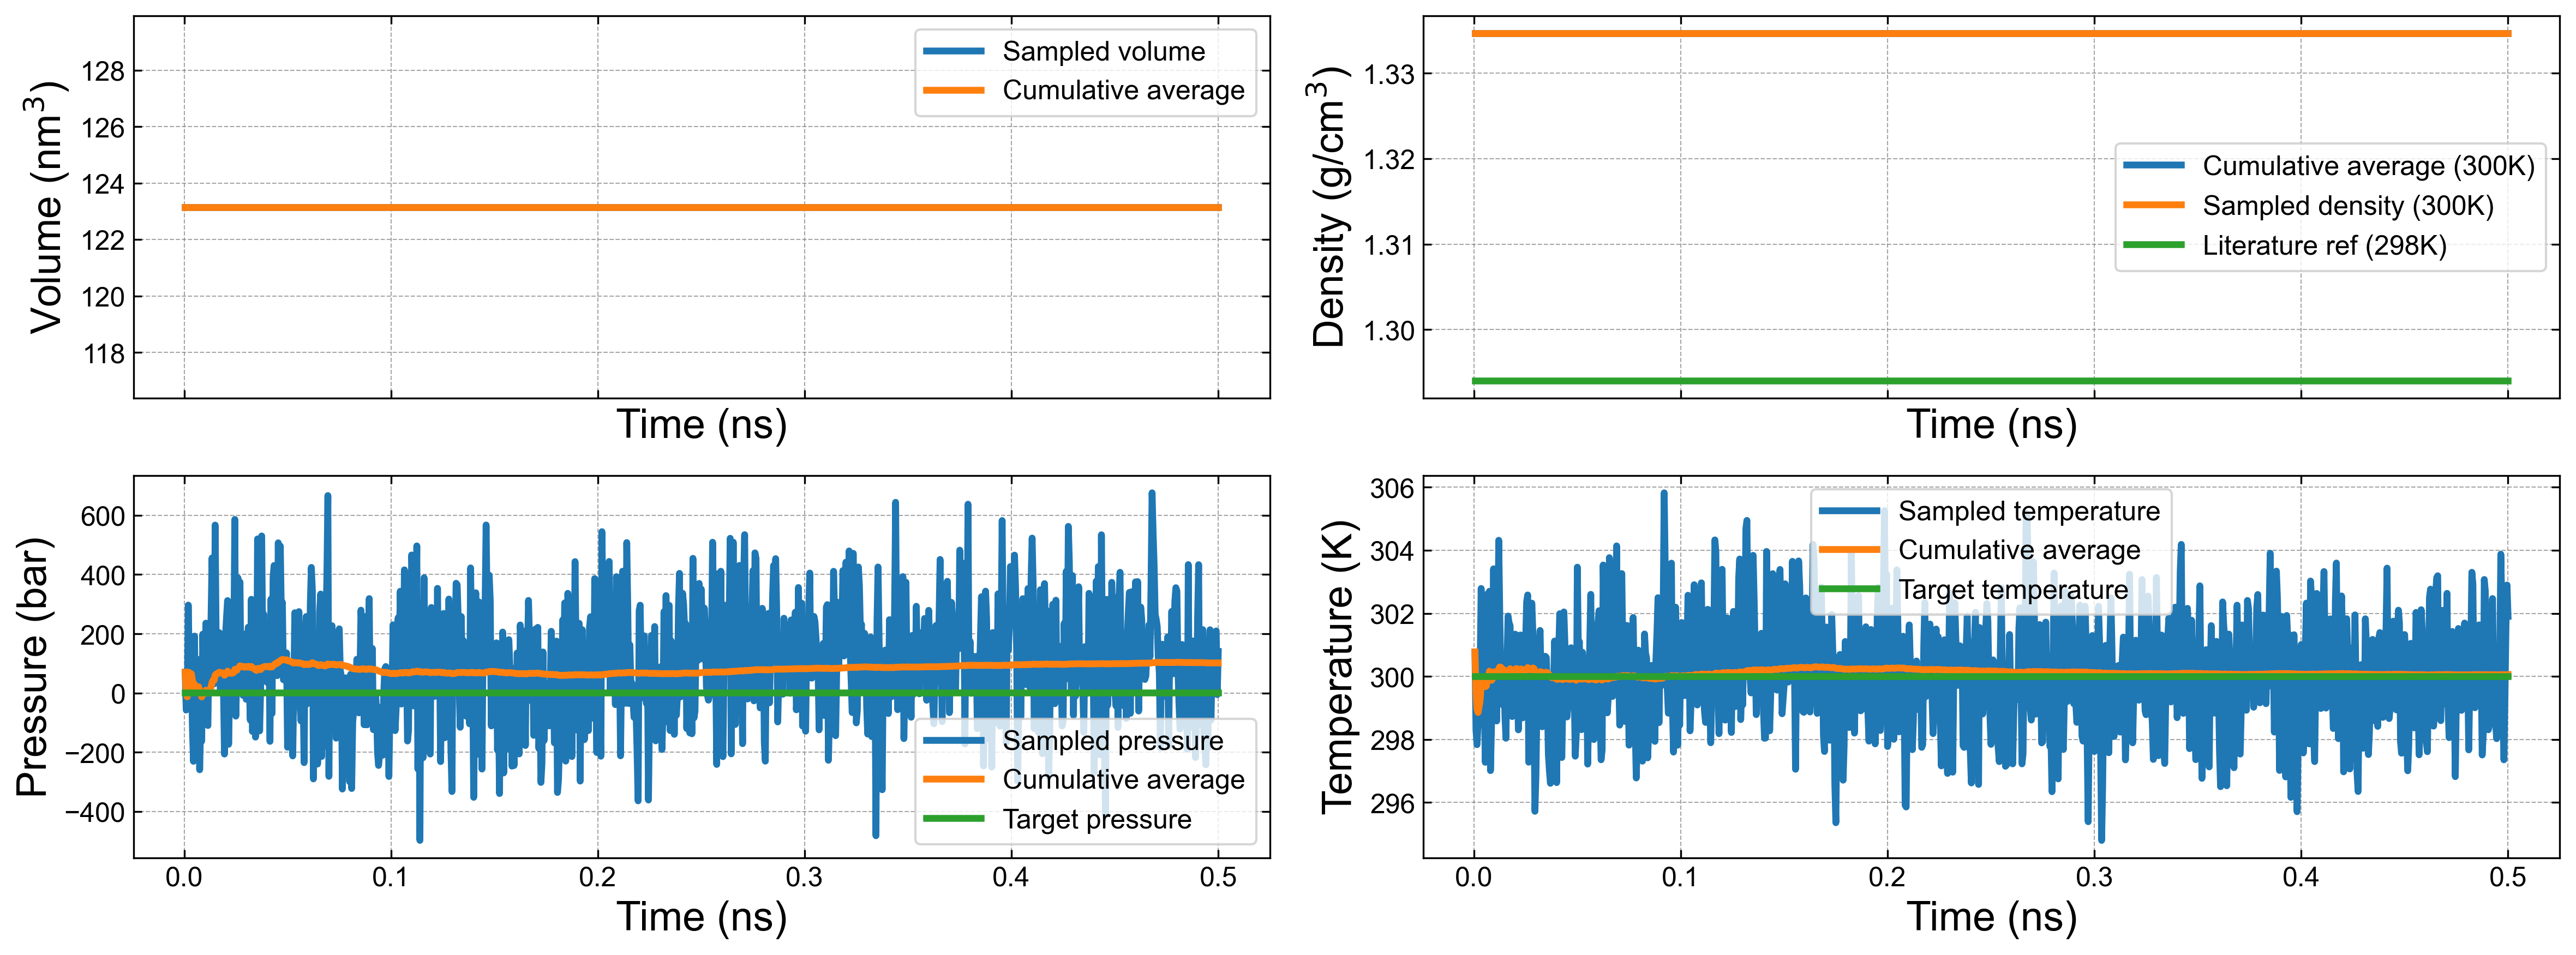

In [43]:
# Make a 2 x 1 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.set_size_inches(16, 6)

# Plot the volume
axes[0, 0].plot(timeStep*vol_values[:, 0], vol_values[:, 1]*volumeScale, label='Sampled volume')
axes[0, 0].plot(timeStep*vol_values[:, 0], vol_cumulative*volumeScale, label='Cumulative average')

# Label the axes
axes[0, 0].set_xlabel('Time (ns)')
axes[0, 0].set_ylabel(r'Volume (nm$^3$)')
axes[0, 0].legend()

axes[0, 1].plot(timeStep*vol_values[:, 0], den_cumulative*densityScale, label='Cumulative average (300K)')
axes[0, 1].plot(timeStep*vol_values[:, 0], den_vals*densityScale, label='Sampled density (300K)')
axes[0, 1].plot(timeStep*vol_values[:, 0], refDensity*np.ones(vol_values.shape[0]), label='Literature ref (298K)')
axes[0, 1].set_xlabel('Time (ns)')
axes[0, 1].set_ylabel(r'Density (g/cm$^3$)')
axes[0, 1].legend()

# Plot the pressure
axes[1, 0].plot(timeStep*pressure_values[:, 0], pressure_values[:, 1], label='Sampled pressure')
axes[1, 0].plot(timeStep*pressure_values[:, 0], pressure_cumulative, label='Cumulative average')
axes[1, 0].plot(timeStep*pressure_values[:, 0], targetPressure*np.ones(pressure_values.shape[0]), label='Target pressure')
axes[1, 0].set_xlabel('Time (ns)')
axes[1, 0].set_ylabel(r'Pressure (bar)')
#axes[2].set_ylim(0, 25)
axes[1, 0].legend()

# Plot the temperature
axes[1, 1].plot(timeStep*temperature_values[:, 0], temperature_values[:, 1], label='Sampled temperature')
axes[1, 1].plot(timeStep*temperature_values[:, 0], temp_cumulative, label='Cumulative average')
axes[1,1].plot(timeStep*temperature_values[:, 0], 300*np.ones(temperature_values.shape[0]), label='Target temperature')
axes[1, 1].set_xlabel('Time (ns)')
axes[1, 1].set_ylabel(r'Temperature (K)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()




In [3]:
sys.path.append('/Users/nickhattrup/Documents/research/projects/KAMEL-LOBE')
from KAMEL_LOBE import KAMEL_LOBE
plt.style.use('/Users/nickhattrup/Documents/research/projects/PAEstimate/analysis/plotting_style.mplstyle')
def parseRDF(file):
    with open(file) as f:
        f.readline()
        f.readline()
        f.readline()
        _, bins = f.readline().split()
        bins = int(bins)
        length = len(f.readlines()) + 1
    samples = length // (bins+1)
    times = np.empty(samples)
    distances = np.empty(bins)
    rdf = np.empty((samples, bins))
    with open(file) as f:
        data = f.readlines()
        offSet = 3
        idx = 0
        for i in range(offSet, length, bins+1):
            times[idx] = float(data[i].split()[0])
            for j in range(i+1, i+bins+1):
                rdf[idx, j-i-1] = float(data[j].split()[-1]) # Normalized against density
            idx += 1
        for i in range(offSet+1, offSet+bins+1):
            distances[i-offSet-1] = float(data[i].split()[1]) # Actual values
    return times, distances, rdf

In [5]:
cation_rdf_file = '/Users/nickhattrup/Documents/research/projects/MDPilot/examples/ionic_liquid/1_3_dimethylimidazolium_BF4/moltemplate_files/rdf_cation_modvolume_nvt.dat'
anion_rdf_file = '/Users/nickhattrup/Documents/research/projects/MDPilot/examples/ionic_liquid/1_3_dimethylimidazolium_BF4/moltemplate_files/rdf_anion_modvolume_nvt.dat'

In [7]:
times, cat_distances, cation_rdf = parseRDF(cation_rdf_file)
times, anion_distances, anion_rdf = parseRDF(anion_rdf_file)

In [15]:
anion_rdf.shape

(1001, 250)